#### Añadimos el directorio raiz al sys.path para facilitar importaciones 

In [1]:
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
os.chdir(root_dir)

print("Directorio de trabajo actual después del cambio:", os.getcwd())

Directorio de trabajo actual después del cambio: /home/user/workshop2/workshop2


Si a este codigo lo ejecutas mas de una vez puede que empiese a pasear por tu directorio lo que puede generar errores en las importaiones, si te ocurre reinicia el Kernel y vuelvelo a ejecutar.

#### Importamos las Librerias 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Puede instalar las librerias ejecutando el siguiente comando en la terminal: pip install -r requirements.txt

#### Importamos la conexion

In [3]:
from Base_de_Datos_Operaciones.conexionBD import create_connection

connection = create_connection()

Conectando con la Base de Datos...
Conexion con la Base de Datos MySQL Lograda.


#### Leemos la tabla candidates ubicada en nuesta Base de Datos, y lo almacenamos en un Dataframe

In [5]:
query = "SELECT * FROM Grammys;"
Grammys = pd.read_sql(query, connection)
Grammys.head()

/tmp/ipykernel_19579/1884780702.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Grammys = pd.read_sql(query, connection)


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,1
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,1
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,1
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,1
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,1


#### Informacion Sobre el Dataset 

In [6]:
Grammys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          4810 non-null   int64         
 1   title         4810 non-null   object        
 2   published_at  4810 non-null   datetime64[ns]
 3   updated_at    4810 non-null   datetime64[ns]
 4   category      4810 non-null   object        
 5   nominee       4810 non-null   object        
 6   artist        4810 non-null   object        
 7   workers       4810 non-null   object        
 8   img           4810 non-null   object        
 9   winner        4810 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 375.9+ KB


Podemos ver que el Dataset contiene 10 Columnas y 4.810 Filas, tambien se puede evidenciar que 6 de esas columnas son de tipo objec (Contiene texto), 2 de tipo int64 (numericas) y 2 de tipo datetime (fecha y la hora). 

Tambien se pude ver el peso del dataframe que es de 375.9 KB

#### Columnas Dataset Descripcion 

- **year:** El año en el que tuvo lugar la ceremonia de los premios Grammy.
- **Descripción:** El nombre completo del evento o ceremonia, que en este caso es la 62ª edición de los Grammy Awards.
- **published_at:** La fecha y hora en que se publicó la información sobre la nominación o el premio. Está en formato de fecha y hora ISO 8601, incluyendo la zona horaria.
- **updated_at:** La fecha y hora en la que se actualizó la información por última vez, también en formato ISO 8601.
- **category:** La categoría específica del premio. En este caso, la categoría es "Record Of The Year".
- **nominee:** El nombre de la canción nominada para la categoría.
- **artist:** El nombre del artista principal asociado con la nominación.
- **workers:** Lista de los productores, ingenieros, mezcladores y otros profesionales que trabajaron en la grabación. Esto puede incluir varios roles asociados con la producción del disco.
- **img:** URL de la imagen asociada con el artista o nominación, que probablemente sea un retrato o foto del artista.
- **winner:** Indica si la canción/artista ganó el premio en esa categoría. Se representa como un valor booleano (True si ganó, False si no).

#### Revisamos la presencia de valores nulos

In [7]:
Valores_nulos = Grammys.isnull().sum()
print(Valores_nulos)

year            0
title           0
published_at    0
updated_at      0
category        0
nominee         0
artist          0
workers         0
img             0
winner          0
dtype: int64


No hay presencia de valores nulos en el Dataset 

#### Revisamos la presencia de valores duplicados

In [8]:
valores_duplicados = Grammys.duplicated().sum()
print(valores_duplicados)

0


No hay presencia de datos dupliados 

#### Revisamos la presencia de datos atipicos

Para la columna de Los artistas haremos un grafico de barras de los mas nominados 

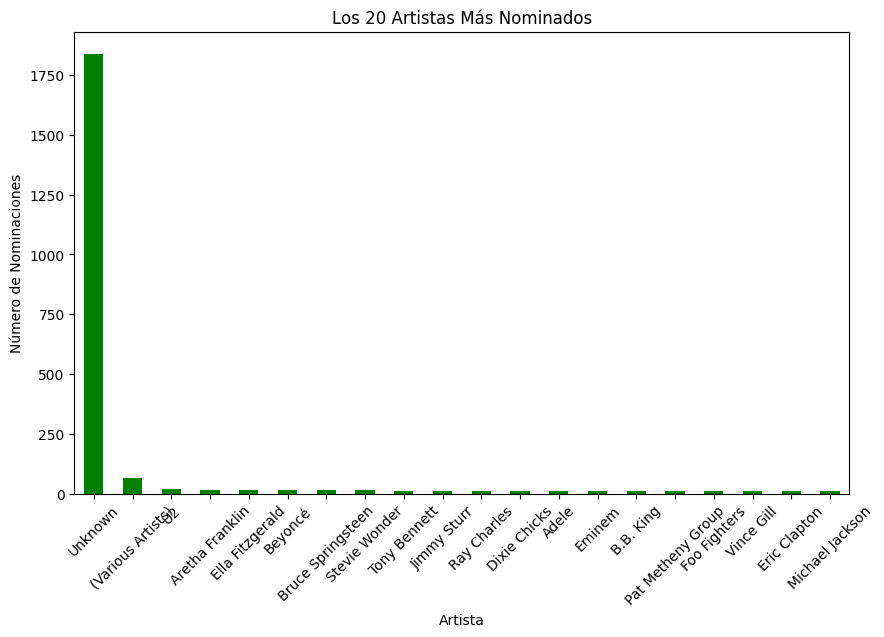

In [23]:
artistas = Grammys['artist'].value_counts()
plt.figure(figsize=(10, 6))
artistas.head(20).plot(kind='bar', color='green')
plt.title('Los 20 Artistas Más Nominados')
plt.xlabel('Artista')
plt.ylabel('Número de Nominaciones')
plt.xticks(rotation=45)
plt.show()

Se puede ver que la columna Unknow es la que tiene mayor nominaciones lo que se puede considerar como un dato atipico por lo que vamos a remplazarlo por un mensaje que nos diga 'Unregistered artist', para un mejor entendimiento en el analisis.

In [24]:
Grammys['artist'] = Grammys['artist'].replace('Unknown', 'Unregistered artist')
print(Grammys['artist'].value_counts())

artist
Unregistered artist                                         1840
(Various Artists)                                             66
U2                                                            18
Aretha Franklin                                               16
Ella Fitzgerald                                               13
                                                            ... 
(Franklin Delano Roosevelt)                                    1
Jonathan & Darlene Edwards (Jo Stafford And Paul Weston)       1
Frank Sinatra And Original Cast                                1
Norman Luboff Choir                                            1
Jonas Brothers                                                 1
Name: count, Length: 1659, dtype: int64


Para la columna de los 10 trabajadores mas comunes 

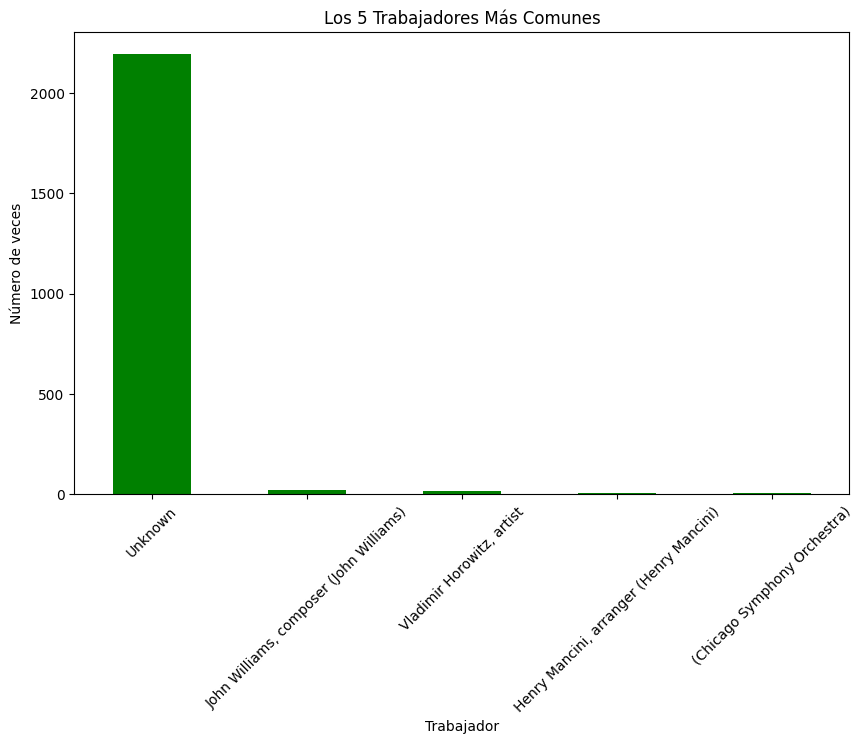

In [29]:
trabajadores = Grammys['workers'].value_counts()
plt.figure(figsize=(10, 6))
trabajadores.head(5).plot(kind='bar', color='green') 
plt.title('Los 5 Trabajadores Más Comunes')
plt.xlabel('Trabajador')
plt.ylabel('Número de veces')
plt.xticks(rotation=45)
plt.show()

Miramos que Unknow es el trabajador mas comun sin envargo este es un atipico pues no brinda mayor informacion, por lo que se va a convertir esta culomna por un mensaje que diga 'unregistered worker', para un mayor entendimiento surante el analisis.

In [31]:
Grammys['workers'] = Grammys['workers'].replace('Unknown', 'Unregistered worker')
print(Grammys['workers'].value_counts())

workers
Unregistered worker                                                                                                                                                              2190
John Williams, composer (John Williams)                                                                                                                                            20
Vladimir Horowitz, artist                                                                                                                                                          15
Henry Mancini, arranger (Henry Mancini)                                                                                                                                             8
(Chicago Symphony Orchestra)                                                                                                                                                        7
                                                                                  

In [10]:
print(Grammys['nominee'].value_counts())
print(Grammys['img'].value_counts())

category
Song Of The Year                                                                          70
Record Of The Year                                                                        69
Album Of The Year                                                                         66
Best Opera Recording                                                                      64
Best Album Notes                                                                          63
                                                                                          ..
Best Sound Track Album, Dramatic Picture Score Or Original Cast                            1
Best Performance, Documentary Or Spoken Word                                               1
Best Classical Performance - Instrumentalist (With Concerto Scale Accompaniment)           1
Best Classical Performance - Instrumentalist (Other Than Concerto-Scale Accompaniment)     1
Best Classical Performance - Operatic Or Choral              

Creamos un grafico de dispersion para ver la columna de 'year' y poder identificar algun dato atipico 

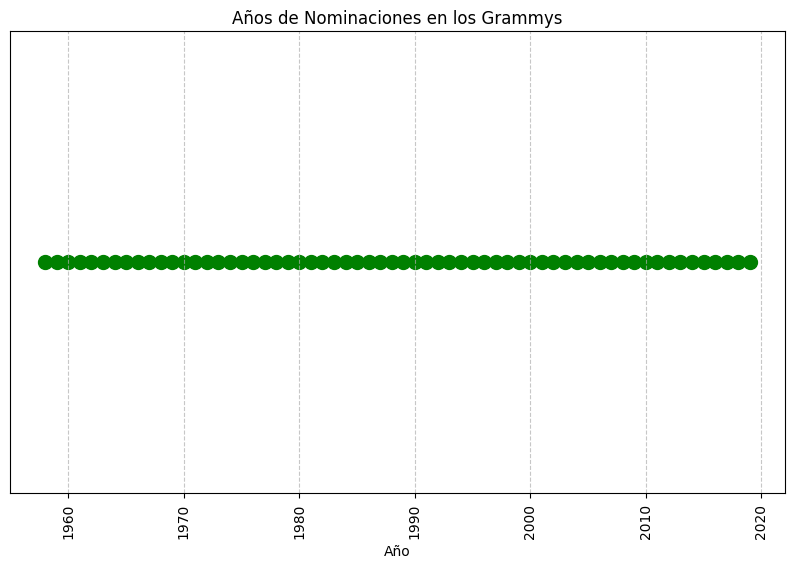

In [33]:
años_unicos = Grammys['year'].unique()

plt.figure(figsize=(10, 6))
plt.scatter(años_unicos, [1] * len(años_unicos), color='green', s=100)  
plt.title('Años de Nominaciones en los Grammys')
plt.xlabel('Año')
plt.yticks([])  
plt.xticks(rotation=90)  
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.show()

No hay datos atipicos en esta columna 

Para la fila de category vamos a identificar la presencia de valores nulos mirando si hay valores en blanco o con la palabra Unknow.

In [47]:
datos_blancos = Grammys['category'].isnull()
datos_unknown = Grammys['category'].str.contains('Unknown', na=False)

conteo_blancos = datos_blancos.sum()
conteo_unknown = datos_unknown.sum()

print(f"Número de datos en blanco en 'category': {conteo_blancos}")
print(f"Número de datos con 'Unknown' en 'category': {conteo_unknown}")

Número de datos en blanco en 'category': 0
Número de datos con 'Unknown' en 'category': 0


Vemos que no hay ningun dato con estas condiciones lo que nos puede indicar que no hay datos atipicos en esta fila 

Hacemos lo mismo para la columna de nominee 

In [48]:
datos_blancos_nominee = Grammys['nominee'].isnull()
datos_unknown_nominee = Grammys['nominee'].str.contains('Unknown', na=False)

conteo_blancos_nominee = datos_blancos_nominee.sum()
conteo_unknown_nominee = datos_unknown_nominee.sum()

print(f"Número de datos en blanco en 'nominee': {conteo_blancos_nominee}")
print(f"Número de datos con 'Unknown' en 'nominee': {conteo_unknown_nominee}")

Número de datos en blanco en 'nominee': 0
Número de datos con 'Unknown' en 'nominee': 6


Se puede ver que hay presencia de 6 valores Uknow por lo que lo vamos a remplazar por 'unregistered nominee' para un mayor entendimiento.